In [1]:
from pychiver.archiver import Archiver

### Import the data

In [2]:
archiver = Archiver(archiver_url='http://archiver-01.tn.esss.lu.se')

pvs = ("RFQ-010:RFS-VacMon-110:Status-Ilck-RB",
       "RFQ-010:RFS-VacMon-140:Status-Ilck-RB",
       "RFQ-010:RFS-FIM-101:RP1-Ilck-RB",  # reflected power 1
       "RFQ-010:RFS-FIM-101:RP2-Ilck-RB")  # reflected power 2

start = "2021-07-14 14:00:00"
end = "2021-07-14 15:30:00"

In [3]:
pvs_subset = (pvs[1],pvs[3])

In [4]:
from pychiver.calculations import LastAcquiredValueInterpolationStrategy

data = archiver.get(pvs_subset, start_date=start, end_date=end)

# data = archiver.getAligned((pvs[0],pvs[3]), start_date=start, end_date=end, 
#                            strategy=LastAcquiredValueInterpolationStrategy)

### Investigate the data

In [5]:
data[pvs[3]]

secs  val      nanos  severity  status          status_label  \
0    1626271203    0  976285038         0       0  EpicsStatus.NO_ALARM   
1    1626271204    1   70790996         0       0  EpicsStatus.NO_ALARM   
2    1626271211    0  148172601         0       0  EpicsStatus.NO_ALARM   
3    1626271211    1  233532787         0       0  EpicsStatus.NO_ALARM   
4    1626271211    0  322027153         0       0  EpicsStatus.NO_ALARM   
..          ...  ...        ...       ...     ...                   ...   
665  1626276441    1  711938788         0       0  EpicsStatus.NO_ALARM   
666  1626276442    0  703005255         0       0  EpicsStatus.NO_ALARM   
667  1626276443    1  711986494         0       0  EpicsStatus.NO_ALARM   
668  1626276578    0  144469020         0       0  EpicsStatus.NO_ALARM   
669  1626276578    1  648600398         0       0  EpicsStatus.NO_ALARM   

             severity_label    secs_nanos                          time  
0    EpicsSeverity.NO_ALARM  1.626271e+09 2021-07-14 14:00:03.976284928  
1    EpicsSeverity.NO_ALARM  1.626271e+09 2021-07-14 14:00:04.070790912  
2    EpicsSeverity.NO_ALARM  1.626271e+09 2021-07-14 14:00:11.148172544  
3    EpicsSeverity.NO_ALARM  1.626271e+09 2021-07-14 14:00:11.233532928  
4    EpicsSeverity.NO_ALARM  1.626271e+09 2021-07-14 14:00:11.322027264  
..                      ...           ...                           ...  
665  EpicsSeverity.NO_ALARM  1.626276e+09 2021-07-14 15:27:21.711938816  
666  EpicsSeverity.NO_ALARM  1.626276e+09 2021-07-14 15:27:22.703005440  
667  EpicsSeverity.NO_ALARM  1.626276e+09 2021-07-14 15:27:23.711986432  
668  EpicsSeverity.NO_ALARM  1.626277e+09 2021-07-14 15:29:38.144468992  
669  EpicsSeverity.NO_ALARM  1.626277e+09 2021-07-14 15:29:38.648600320  

[670 rows x 9 columns]

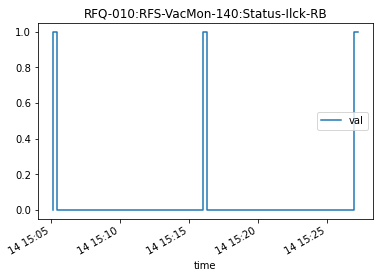

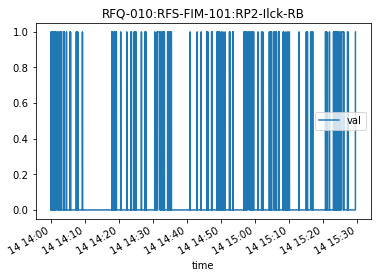

In [6]:
for one in pvs_subset:
    data[one].plot(x='time', y='val', title=one, drawstyle="steps")

## Finding close occurances

to find the similar occurances (default RISE), call `compare` method. It will return the timestamops of close (via the provided tolerance) occurances

In [7]:
from pychiver.calculations import Edge
import pychiver

#pychiver.setVerbose()
comp_data = archiver.compare(pvs_subset,
                        start_date=start,
                        end_date=end,
                        tolerance_in_seconds=0.15,
                        compare_edge=Edge.FALLING
                            )


import datetime
for one in comp_data:
    print(datetime.datetime.fromtimestamp(one))

2021-07-14 17:27:19.708025
